<a href="https://colab.research.google.com/github/Anki4512/Class-Work/blob/main/Ad_Click_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as make_classification


In [5]:
from sklearn.datasets import make_classification

# 1. Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# 2. Convert it to a DataFrame so we can see it
df = pd.DataFrame(X)
df['Clicked_Ad'] = y  # Add the target column

# 3. Peek at the data
df.head()


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,Clicked_Ad
0,-0.669356,-1.495778,-0.870766,1.141831,0.021606,1.730630,-1.251698,0.289305,0.357163,-0.196811,...,0.154850,-0.219970,-0.739137,1.802012,1.634606,-0.938180,-1.267337,-1.276334,1.016643,1
1,0.093372,0.785848,0.105754,1.272354,-0.846316,-0.979093,1.263707,0.264020,2.411677,-0.960046,...,0.199810,0.288724,0.732492,-0.872002,-1.654887,-1.130204,-0.122709,0.693431,0.911363,0
2,-0.905797,-0.608341,0.295141,0.943716,0.092936,1.370397,-0.064772,0.287273,-0.533004,-0.032504,...,-0.510064,-0.868768,-0.598279,0.019832,0.613460,-1.779439,0.830498,-0.737332,-0.578212,1
3,-0.585793,0.389279,0.698816,0.436236,-0.315082,0.459505,1.448820,0.505558,-1.440982,-1.134020,...,1.466783,0.678728,-1.190917,-1.442381,-0.929136,-0.221600,-0.346772,0.034246,-1.040199,1
4,1.146441,0.515579,-1.222895,-0.396230,-1.293508,-0.352428,0.071254,1.239584,1.007133,-1.479444,...,-0.918127,0.604121,1.068379,-0.882271,2.303639,-0.973379,1.259233,0.360015,1.920368,0


In [6]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))


0.9


In [9]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))


0.9


In [10]:
from sklearn.model_selection import GridSearchCV
parm_grid={'n_estimators': [10,50,100]}
grid_search = GridSearchCV(estimator=model, param_grid=parm_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)




{'n_estimators': 100}


In [11]:
# 1. Ask the "optimized" model to predict
final_predictions = grid_search.predict(X_test)

# 2. Score the answers
print(accuracy_score(y_test, final_predictions))


0.9


In [18]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': np.arange(10, 210, 10),
    'max_depth': [None, 10, 20, 30]
}



In [20]:

random_search = RandomizedSearchCV(estimator=model,
                                   param_distributions=param_dist,
                                   n_iter=10,
                                   cv=5,
                                   random_state=42)

# Train the Random Search model
random_search.fit(X_train, y_train)

# --- 5. The Final Results ---
print(f"Random Search Best Params: {random_search.best_params_}")
print(f"Random Search Accuracy: {random_search.score(X_test, y_test)}")


Random Search Best Params: {'n_estimators': np.int64(120), 'max_depth': 10}
Random Search Accuracy: 0.885


In [22]:
print(model.feature_importances_)


[0.01695078 0.10181962 0.02108998 0.01368187 0.01554572 0.36313417
 0.02333904 0.01519547 0.01549653 0.0158737  0.01915803 0.02569037
 0.01922067 0.01651946 0.07557534 0.01734487 0.01852994 0.01427792
 0.17725206 0.01430447]


In [25]:
print(df.columns)

Index([           0,            1,            2,            3,            4,
                  5,            6,            7,            8,            9,
                 10,           11,           12,           13,           14,
                 15,           16,           17,           18,           19,
       'Clicked_Ad'],
      dtype='object')


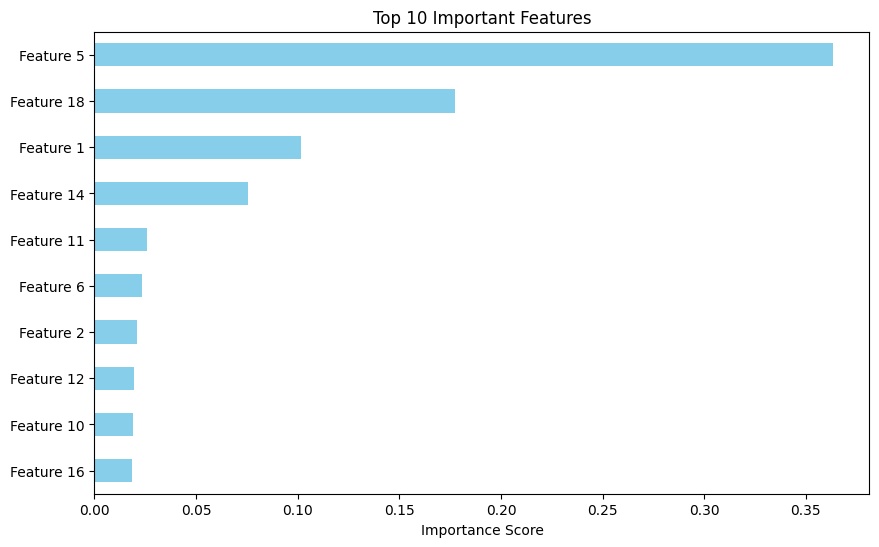

In [26]:
import matplotlib.pyplot as plt

# 1. Create a list of names (You can change these to 'Age', 'Income', etc. if you want!)
feature_names = [f"Feature {i}" for i in range(X_train.shape[1])]

# 2. Link the scores to these new names
importances = pd.Series(model.feature_importances_, index=feature_names)

# 3. Sort and Plot
top_features = importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_features.plot(kind='barh', color='skyblue')
plt.title('Top 10 Important Features')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis() # Puts the "winner" at the top!
plt.savefig('my_chart.png') # Saves the file
